# Evaluate classification rules in decision-rules

In this tutorial we will evaluate decision rules for regression.

First, we load the boston housing dataset. The column MEDV (median house price in $1000s) is our target variable `y`, the other ones are the predictors `X`.

In [1]:
import pandas as pd
df = pd.read_csv('resources/boston.csv')
display(df)
X = df.drop(columns=['MEDV'])
y = df['MEDV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
502,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,396.90,9.08,20.6
503,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,396.90,5.64,23.9
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22.0


We want to predict the values of `y` from `X` using a set of decision rules. The rules are already created, we will load them from a JSON file.

In [2]:
import json

from decision_rules import measures
from decision_rules.serialization import JSONSerializer
from decision_rules.regression.ruleset import RegressionRuleSet

# Read the JSON file.
ruleset_path = 'resources/boston_ruleset.json'
with open(ruleset_path) as fp:
    json_ruleset = json.load(fp)

# Create a RegressionRuleSet object from the dict that was stored in JSON.
ruleset: RegressionRuleSet = JSONSerializer.deserialize(json_ruleset, RegressionRuleSet)
ruleset.update(X, y, measure=measures.c2)
# Print the rules in the rule set.
for rule in ruleset.rules:
    print(rule)

IF AGE >= 16.35 AND PTRATIO < 17.50 AND RM >= 7.48 AND LSTAT < 6.25 THEN MEDV = {47.78} [44.45, 51.11] (p=17, n=2, P=23, N=483)
IF RM < 8.35 AND ZN < 92.50 AND CRIM < 0.59 AND CRIM >= 0.02 AND RM >= 7.42 THEN MEDV = {43.01} [38.58, 47.43] (p=13, n=6, P=14, N=492)
IF LSTAT >= 3.15 AND RM < 8.32 AND CRIM >= 0.04 AND INDUS < 18.84 AND AGE >= 24.45 AND RM >= 7.26 THEN MEDV = {36.57} [27.64, 45.49] (p=16, n=5, P=85, N=421)
IF RM < 7.28 AND PTRATIO < 18.50 AND ZN < 92.50 AND CRIM >= 0.01 AND CHAS < 0.50 AND B >= 363.19 AND RM >= 7.08 THEN MEDV = {35.09} [33.44, 36.74] (p=9, n=3, P=16, N=490)
IF AGE < 82.95 AND INDUS >= 1.34 AND LSTAT < 9.10 AND NOX >= 0.40 AND DIS < 9.06 THEN MEDV = {28.86} [21.29, 36.43] (p=110, n=31, P=211, N=295)
IF DIS < 1.89 AND DIS >= 1.50 AND CRIM >= 13.08 AND CRIM < 43.64 AND NOX >= 0.66 THEN MEDV = {9.09} [7.17, 11.02] (p=11, n=2, P=29, N=477)
IF LSTAT >= 20.70 AND LSTAT < 33.01 AND CRIM < 43.64 AND DIS >= 1.37 AND CRIM >= 11.34 AND NOX >= 0.66 THEN MEDV = {9.02} [7

The rule set is loaded and ready for prediction. Let's generate predictions for the examples in the dataset.

In [3]:
y_pred = ruleset.predict(X)
df['MEDV_pred'] = y_pred
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,MEDV_pred
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0,29.104371
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6,22.998734
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7,32.171973
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4,30.458412
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2,32.171973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4,26.221980
502,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,396.90,9.08,20.6,25.626787
503,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,396.90,5.64,23.9,29.214162
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22.0,29.214162


We can calculate the basic regression metrics using `calculate_for_regression`. The returned value is a dict with keys:

- `general`: general metrics, such as RMSE.
- `histogram`: a histogram of errors.

General metrics


{'RMSE': 4.90202509087278,
 'MAE': 3.2308461981595062,
 'MAPE': 0.15617752551676722,
 'rRMSE': 0.21755058026782434,
 'rMAE': 0.14338410190400555,
 'maxError': 37.77272727272727,
 'R^2': 0.7153520927414723}

Histogram of errors


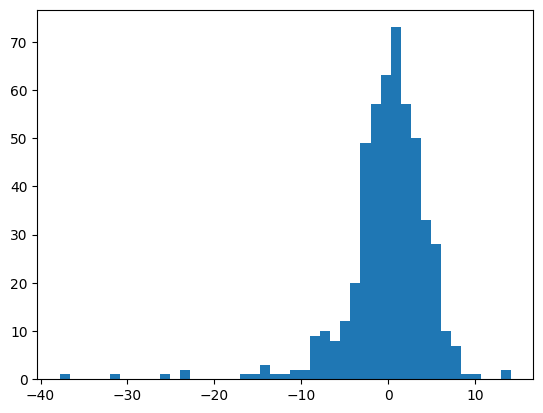

In [4]:
from decision_rules.regression.prediction_indicators import calculate_for_regression
import matplotlib.pyplot as plt

print('General metrics')
metrics = calculate_for_regression(y, y_pred)
display(metrics['general'])

print('Histogram of errors')
bins = metrics['histogram']['bin_edges']
counts = metrics['histogram']['histogram']
_ = plt.stairs(counts, bins, fill=True)

The coverage matrix shows which rules cover each of the examples. We can calculate it calling the `calculate_coverage_matrix` function of the ruleset object. It accepts one argument `X` which is a `DataFrame` of examples to check.

The function returns a 2D boolean numpy array. Number of rows is equal to the number of rows (examples) in `X` and number of columns is the same as the number of rules in the rule set. A `True` value means that the example is covered by the rule.

In [5]:
coverage_matrix = ruleset.calculate_coverage_matrix(X.iloc[:5])
display(coverage_matrix)
print(f'Number of examples: {coverage_matrix.shape[0]}')
print(f'Number of rules: {coverage_matrix.shape[1]}')

array([[False, False, False, False,  True, False, False, False, False,
        False,  True, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False],
       [False, False, False,  True,  True, False, False, False, False,
        False, False, False,  True, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False,  True, False, False, False, False],
       [False, False, False,  True,  True, False, False, False, False,
        False, False, False,  True, False, False, False, False]])

Number of examples: 5
Number of rules: 17


The `calculate_rules_metrics` function of a ruleset object computes metrics describing each of the rules in the rule set. The explanations of the metrics can be found in the [documentation of ruleminer](https://github.com/ruleminer/ruleminer/wiki/10-Description-of-the-results-obtained).

In [ ]:
metrics = ruleset.calculate_rules_metrics(X, y)
for rule_id, metrics in metrics.items():
    print('Rule', rule_id)
    print(metrics)

Rule fc70c54b-02f9-4cd5-81d0-7f73d85dc367
{'p': 17, 'n': 2, 'P': 23, 'N': 483, 'p_unique': 17, 'n_unique': 17, 'support': 19, 'conditions_count': 4, 'y_covered_avg': 47.77894736842106, 'y_covered_median': 50.0, 'y_covered_min': 37.6, 'y_covered_max': 50.0, 'mae': 25.395548158934893, 'rmse': 26.8660974796374, 'mape': 1.5125990035583592, 'p-value': 4.231965993998835e-06}
Rule 1634ea74-f2aa-400b-8ba4-1b658578b00a
{'p': 13, 'n': 6, 'P': 14, 'N': 492, 'p_unique': 13, 'n_unique': 13, 'support': 19, 'conditions_count': 5, 'y_covered_avg': 43.00526315789473, 'y_covered_median': 43.5, 'y_covered_min': 33.4, 'y_covered_max': 50.0, 'mae': 21.032764718119402, 'rmse': 22.439720251538724, 'mape': 1.2702153772414488, 'p-value': 0.00032332389088428164}
Rule cdc83a4b-d169-4372-a508-af418d02b556
{'p': 16, 'n': 5, 'P': 85, 'N': 421, 'p_unique': 16, 'n_unique': 16, 'support': 21, 'conditions_count': 6, 'y_covered_avg': 36.56666666666666, 'y_covered_median': 35.2, 'y_covered_min': 15.0, 'y_covered_max': 50

The `calculate_ruleset_stats` function returns some general statistics regarding the rules present in the rule set.

In [7]:
general_stats = ruleset.calculate_ruleset_stats()
print(general_stats)

{'rules_count': 17, 'avg_conditions_count': 5.12, 'avg_precision': 0.82, 'avg_coverage': 0.45, 'total_conditions_count': 87}


We can use `calculate_condition_importances` and `calculate_attribute_importances` to find the importances of conditions in the rules and consequently the importances of attributes in the data set.

In [ ]:
condition_importances = ruleset.calculate_condition_importances(X, y, measure=measures.c2)
display(condition_importances)

[{'condition': 'NOX >= 0.66',
  'attributes': ['NOX'],
  'importance': 0.41219564492890814},
 {'condition': 'CRIM >= 6.84',
  'attributes': ['CRIM'],
  'importance': 0.3463070344654806},
 {'condition': 'RM >= 7.48',
  'attributes': ['RM'],
  'importance': 0.28703662615958525},
 {'condition': 'CRIM >= 6.99',
  'attributes': ['CRIM'],
  'importance': 0.2581918553894471},
 {'condition': 'RM >= 7.42',
  'attributes': ['RM'],
  'importance': 0.21428470226221466},
 {'condition': 'LSTAT < 7.96',
  'attributes': ['LSTAT'],
  'importance': 0.1841743175107864},
 {'condition': 'RM >= 7.26',
  'attributes': ['RM'],
  'importance': 0.17189228602638446},
 {'condition': 'LSTAT < 9.92',
  'attributes': ['LSTAT'],
  'importance': 0.1597209591117324},
 {'condition': 'LSTAT < 10.14',
  'attributes': ['LSTAT'],
  'importance': 0.13977988686201942},
 {'condition': 'LSTAT >= 14.43',
  'attributes': ['LSTAT'],
  'importance': 0.13474623065608687},
 {'condition': 'CRIM < 0.57',
  'attributes': ['CRIM'],
  'im

In [9]:
attribute_importances = ruleset.calculate_attribute_importances(condition_importances)
display(attribute_importances)

{'CRIM': 1.5328105685047448,
 'RM': 1.3313204662551184,
 'LSTAT': 1.2677399169074535,
 'NOX': 0.5215712597945998,
 'B': 0.15373225007780103,
 'AGE': 0.150463009104594,
 'DIS': 0.13493477983881683,
 'PTRATIO': 0.12797794874640822,
 'CHAS': 0.05575023428251599,
 'TAX': 0.049227431592148,
 'INDUS': 0.04492221223903476,
 'ZN': 0.04309189275034518}